In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Setting

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-XgX51fuEq5eo_mPQmHvDdAOMnOb9bv0JqA&usqp=CAU)


In this exercise, we work with a data set that contains the soccer game performance of countries. from Fédération Internationale de Football Association (FIFA) has a method to compute the points each country gets. The points indicate the performance of countries and are re-calculated several times a year. 

In this dataset, each row presents the performance data for a given country in a given ranking date. The data goes from 2/3/2010 to 12/10/2020 for over 200 participating countries.


In [2]:
Fifa=pd.read_csv("Fifa.csv")
Fifa

,country_full,country_abrv,total_points,confederation,rank_date
0,Spain,ESP,1627,UEFA,2/3/2010
1,Netherlands,NED,1288,UEFA,2/3/2010
2,Italy,ITA,1209,UEFA,2/3/2010
3,Indonesia,IDN,155,AFC,2/3/2010
4,Hong Kong,HKG,153,AFC,2/3/2010
...,...,...,...,...,...
25740,United Arab Emirates,UAE,1326,AFC,12/10/2020
25741,China PR,CHN,1323,AFC,12/10/2020
25742,Curaçao,CUW,1313,CONCACAF,12/10/2020
25743,Costa Rica,CRC,1427,CONCACAF,12/10/2020


## Q1. [10 Points]


The `confederation` column gives us the confederation a country belongs to.  Each country can only belong to at most one of the following confederations based on its geographic location.

|Abberation|Full Name|
|---|---|
|AFC |Asian Football Confederation in Asia and Australia|
|CAF| Confédération Africaine de Football in Africa|
|CONCACAF|Confederation of North, Central American and Caribbean Association Football in North America and Central America|
|CONMEBOL|Confederación Sudamericana de Fútbol in South America|
|OFC | Oceania Football Confederation in Oceania|
|UEFA |Union of European Football Associations in Europe|

* For each confederation, calculate how many countries **have ever** joined that confederation between 2010 and 2020. Remember that a country might join later than 2010 and leave before 2020.
* Visualize this information using a bar chart. On the x-axis, give the names of the confederations. On the y-axis, give the number of countries that ever joined this confederation between 2010 and 2020. Make sure to add the title and the axis labels.
 

In [3]:
y = []

#AFC
Filter = (Fifa.confederation.values == "AFC")
fifa = Fifa.loc[Filter, ["country_abrv"]]
afc = np.unique(fifa.country_abrv)
afc_count = afc.size
y.append(afc_count)

#CAF
Filter = (Fifa.confederation.values == "CAF")
fifa = Fifa.loc[Filter, ["country_abrv"]]
caf = np.unique(fifa.country_abrv)
caf_count = caf.size
y.append(caf_count)

#CONCACAF
Filter = (Fifa.confederation.values == "CONCACAF")
fifa = Fifa.loc[Filter, ["country_abrv"]]
concacaf = np.unique(fifa.country_abrv)
concacaf_count = concacaf.size
y.append(concacaf_count)

#CONMEBOL
Filter = (Fifa.confederation.values == "CONMEBOL")
fifa = Fifa.loc[Filter, ["country_abrv"]]
conmebol= np.unique(fifa.country_abrv)
conmebol_count = conmebol.size
y.append(conmebol_count)

#OFC
Filter = (Fifa.confederation.values == "OFC")
fifa = Fifa.loc[Filter, ["country_abrv"]]
ofc = np.unique(fifa.country_abrv)
ofc_count = ofc.size
y.append(ofc_count) 

#UEFA
Filter = (Fifa.confederation.values == "UEFA")
fifa = Fifa.loc[Filter, ["country_abrv"]]
uefa = np.unique(fifa.country_abrv)
uefa_count = uefa.size
y.append(uefa_count)

print(y)

[46, 54, 36, 10, 11, 55]


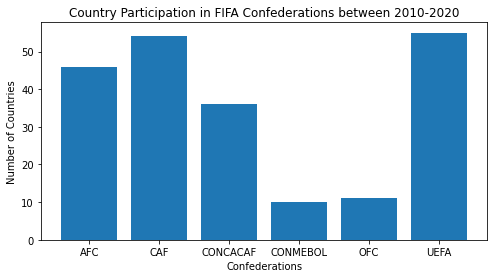

In [4]:
#make the plot larger
plt.figure(figsize=(8,4))
x = ["AFC", "CAF", "CONCACAF", "CONMEBOL", "OFC", "UEFA"]
plt.bar(x,y)
plt.xlabel("Confederations")
plt.ylabel("Number of Countries")
plt.title("Country Participation in FIFA Confederations between 2010-2020")
plt.show()

## Q2. [10 Points]
* Add a column called `ranking` to the original table. This column gives the ranking of a country based on the total_points. A country with a higher total points value on a ranking date is ranked higher (a lower value). 

A toy example of conversion from points to ranking is as follows:

|Country|Hypothetical total points|Hypothetical date|Hypothetical confederation|ranking|
|---|---|---|---|---|
|A|10|May 1, 2010|1|1|
|B|8|May 1, 2010|1|2|
|C|8|May 1, 2010|2|2|
|D|7|May 1, 2010|2|4|
|A|10|Jun 1, 2010|1|2|
|B|12|Jun 1, 2010|1|1|
|C|8|Jun 1, 2010|2|3|
|D|8|Jun 1, 2010|2|3|

[hint, you will find [rank](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html) method helpful.]

* Sort updated the table based on
>* level 1: rank date: oldest to newest
>* level 2: ranking: lowest **value** to highest **value**
>* level 3: Country full name: ascending order 
* Modify the row labels to make sure it follows 0, 1, 2, ...
* Show the table just by type the table name. Do not use print() function




In [5]:
#rank_date to datetime
replacex = lambda x: "0" + x[0][:]
Fifa.rank_date = Fifa.rank_date.str.replace(r"^\d/\d{1,2}/\d{4}", replacex, regex=True)
replacex = lambda x: x[0][0:3] + "0" + x[0][3:]
Fifa.rank_date = Fifa.rank_date.str.replace(r"^\d{2}/\d/\d{4}", replacex, regex=True)
Fifa.rank_date = pd.to_datetime(Fifa.rank_date, format="%m/%d/%Y")

In [6]:
groupedby_date = Fifa.groupby(by="rank_date")
rank = groupedby_date.rank(method="min", ascending=False)

Fifa = Fifa.assign(rank=rank)
Fifa.sort_values(by=["rank_date","rank","country_full"], ascending=[True,True,True], inplace=True)

fifa = Fifa.loc[:,["country_full","total_points","rank_date","confederation","rank"]]
fifa.rank_date = fifa.loc[:,"rank_date"].dt.strftime("%b %d, %Y")

fifa.reset_index(drop=True, inplace=True)
fifa.columns = ["Country","total points", "date", "confederation", "ranking"]

fifa

,Country,total points,date,confederation,ranking
0,Spain,1627,"Feb 03, 2010",UEFA,1.0
1,Brazil,1568,"Feb 03, 2010",CONMEBOL,2.0
2,Netherlands,1288,"Feb 03, 2010",UEFA,3.0
3,Italy,1209,"Feb 03, 2010",UEFA,4.0
4,Portugal,1176,"Feb 03, 2010",UEFA,5.0
...,...,...,...,...,...
25740,Sri Lanka,853,"Dec 10, 2020",AFC,206.0
25741,US Virgin Islands,844,"Dec 10, 2020",CONCACAF,207.0
25742,British Virgin Islands,842,"Dec 10, 2020",CONCACAF,208.0
25743,Anguilla,821,"Dec 10, 2020",CONCACAF,209.0


## Q3. [12 Points]

* Calculate the relationship between rank year and average rank for Spain. Here, rank year values are equal to $2010, 2011, 2012, \dots$. The average rank is equal to the average of all the rankings observed in that year for Spain.
* Visualize the relationship using a line plot with markers.  
* In the same graph, add a line plot to present the information about Germany. Add legend, axis labels, and title to the graph.

In [7]:
#Spain
Filter = (Fifa.country_full.values == "Spain")
esp_avg_rank = Fifa.loc[Filter, ["rank_date","rank"]]
esp_avg_rank.rank_date = esp_avg_rank.loc[:,"rank_date"].dt.year
esp_avg_rank = esp_avg_rank.groupby(by="rank_date").mean()
esp_avg_rank.reset_index(inplace=True)

#Germany
Filter = (Fifa.country_full.values == "Germany")
deu_avg_rank = Fifa.loc[Filter, ["rank_date","rank"]]
deu_avg_rank.rank_date = deu_avg_rank.loc[:,"rank_date"].dt.year
deu_avg_rank = deu_avg_rank.groupby(by="rank_date").mean()
deu_avg_rank.reset_index(inplace=True)

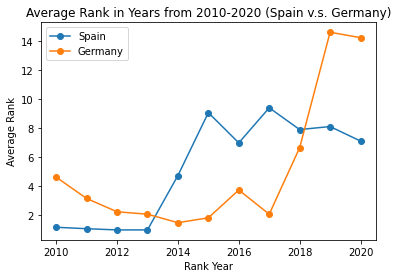

In [8]:
x1 = esp_avg_rank.rank_date.values 
y1 = esp_avg_rank["rank"].values
x2 = deu_avg_rank.rank_date.values 
y2 = deu_avg_rank["rank"].values

plt.plot(x1,y1,marker="o",label="Spain")
plt.plot(x2,y2,marker="o",label="Germany")
plt.xlabel("Rank Year")
plt.ylabel("Average Rank")
plt.title("Average Rank in Years from 2010-2020 (Spain v.s. Germany)")
plt.legend()
plt.show()

## Q4. [13 Points]

* Get all the total points data for the United States and save the values in an array.
* Visualize the **normalized** histogram information when bins=15.
* Print the height of the third bar (interval) based on `NumPy`.
* Calculate the percentage of points falling below the mid-point of the third bar (interval).


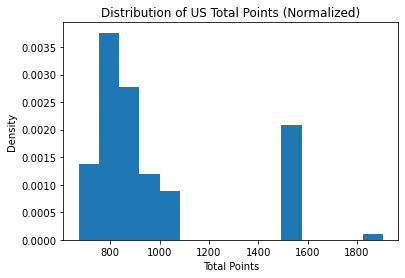

In [9]:
Filter = (Fifa.country_full.values == "USA")
US_points = Fifa.loc[Filter, "total_points"].values

plt.hist(US_points, bins=15, density=True)
plt.title("Distribution of US Total Points (Normalized)")
plt.xlabel("Total Points")
plt.ylabel("Density")
plt.show()

In [10]:
#height 0f 3rd bar
Density, Intervals = np.histogram(US_points,bins=15,density=True)
print(Density[2])

0.002769370759401023


In [11]:
#percentage of points falling below the mid-point of the third bar (interval)
Count, Intervals = np.histogram(US_points,bins=15,density=False)
midpoint = (np.diff(Intervals)[0]/2) + Intervals[2]
Filter = (US_points < midpoint)
denom = np.sum(US_points)
num = US_points[Filter]
num = np.sum(num)
print((num/denom * 100), "%")

51.261235625931064 %


## Q5 [15 Points]

* Construct a table with the following 3 columns:

|rank_date|SpainhigherthanGermany|GermanyhigherthanArgentina|
|---|---|---|
|2010-02-03|1|0|
|2010-03-03|1|0|
|...|...|...|
|2020-12-10|1|1|

For column 2, the value is 1 if Spain ranks strictly higher than Germany.

For column 3, the value is 1 if Germany ranks strictly higher than Argentina.


* Use the table to infer the probability of observing Spain ranks strictly higher than Germany at a random time
* Use the table to infer the probability of observing Germany ranks strictly higher than Argentina at a random time
* Use the table to infer the probability of observing Germany ranks strictly higher than Argentina a random time given Spain ranks strictly higher than Germany.
* Use the table to infer the probability of observing Spain ranks strictly higher than Germany **and** Germany ranks strictly higher than Argentina at a random time

* Use the table to infer the probability of observing Spain ranks strictly higher than Germany **or** Germany ranks strictly higher than Argentina at a random time


In [12]:
Filter1 = (Fifa.country_full.values == "Spain")
Filter2 = (Fifa.country_full.values == "Germany")
Filter3 = (Fifa.country_full.values == "Argentina")

esp_rank = Fifa.loc[Filter1, ["rank_date","rank"]]
deu_rank = Fifa.loc[Filter2, ["rank_date","rank"]]
arg_rank = Fifa.loc[Filter3, ["rank_date","rank"]]

esp_rank_val = esp_rank["rank"].values
deu_rank_val = deu_rank["rank"].values
arg_rank_val = arg_rank["rank"].values

esp_bool = esp_rank_val > deu_rank_val
idx1 = np.where(esp_bool == True)
idx0 = np.where(esp_bool == False)

esp_rank_val[idx1] = 1
esp_rank_val[idx0] = 0

deu_bool = deu_rank_val > arg_rank_val
idx1 = np.where(deu_bool == True)
idx0 = np.where(deu_bool == False)

deu_rank_val[idx1] = 1
deu_rank_val[idx0] = 0

esp_rank.loc[:,"rank"] = esp_rank_val
deu_rank.loc[:,"rank"] = deu_rank_val

table = pd.merge(esp_rank, deu_rank, on="rank_date")
table.columns = ["rank_date", "SpainhigherthanGermany", "GermanyhigherthanArgentina"]
table

,rank_date,SpainhigherthanGermany,GermanyhigherthanArgentina
0,2010-02-03,0.0,0.0
1,2010-03-03,0.0,0.0
2,2010-03-31,0.0,0.0
3,2010-04-28,0.0,0.0
4,2010-05-26,0.0,0.0
...,...,...,...
118,2020-07-16,0.0,1.0
119,2020-09-17,0.0,1.0
120,2020-10-22,0.0,1.0
121,2020-11-26,0.0,1.0


In [13]:
#probability of observing Spain ranks strictly higher than Germany at a random time
sample_space = table.rank_date.size
event1 = np.sum(table.SpainhigherthanGermany)
pr_event1 = event1/sample_space
print(pr_event1)

0.36585365853658536


In [14]:
#probability of observing Germany ranks strictly higher than Argentina at a random time
sample_space = table.rank_date.size
event2 = np.sum(table.GermanyhigherthanArgentina)
pr_event2 = event2/sample_space
print(pr_event2)

0.35772357723577236


In [15]:
#probability of observing Germany ranks strictly higher than Argentina a random time given Spain ranks strictly higher than Germany
# P(G > A | S > G) = P((G > A) AND (S > G)) / P(S > G)
sample_space = table.rank_date.size
Filter = (table.SpainhigherthanGermany.values == 1) & (table.GermanyhigherthanArgentina.values == 1)
event3 = table[Filter].rank_date.size
pr_event3 = event3/sample_space
pr_event4 = pr_event3/pr_event1
print(pr_event4)

0.4222222222222223


In [16]:
#probability of observing Spain ranks strictly higher than Germany and Germany ranks strictly higher than Argentina at a random time
#P((G > A) AND (S > G))
sample_space = table.rank_date.size
sample_space = table.rank_date.size
Filter = (table.SpainhigherthanGermany.values == 1) & (table.GermanyhigherthanArgentina.values == 1)
event3 = table[Filter].rank_date.size
pr_event3 = event3/sample_space
print(pr_event3)

0.15447154471544716


In [17]:
pr_event5 = pr_event1 + pr_event2 - pr_event3
print(pr_event5)

0.5691056910569106
